In [1]:
#IMPORT Libraries

from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# load Wine data
wine=datasets.load_wine()
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [3]:
# Dataframe of Wine Dataset
df_wine = pd.DataFrame(wine.data, columns =wine.feature_names )
df_wine

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [4]:
# This dataset has 13 features, we will only choose a subset of these


selected_features = ["flavanoids", "proline"]

df_selected_features = df_wine[selected_features]
# extract the data as numpy arrays of features, X, and target, y
X = df_wine[selected_features].values
y = wine.target
df_selected_features


,flavanoids,proline
0,3.06,1065.0
1,2.76,1050.0
2,3.24,1185.0
3,3.49,1480.0
4,2.69,735.0
...,...,...
173,0.61,740.0
174,0.75,750.0
175,0.69,835.0
176,0.68,840.0


# 

##  Algorithm Selection and Implementation

### k-Nearest Neighbors (kNN)

<b>Objective:</b>Applying the closest neighbours in the feature space to categorize the type of wine. For classification problems, kNN is a straightforward but effective technique, particularly when the dataset is manageable and simple.

<b>Why kNN:</b> The reason for kNN Multi-class situations such as this one, in which we want to classify wines into different kinds, are well handled by it. It's also simple to visualize and intuitive.

### Decision Trees

<b>Objective:</b>The goal is to build a model that uses basic decision rules deduced from the features to predict the type of wine. Decision trees can handle both category and numerical data, which makes them ideal for classification.

<b>Why Decision Trees:</b>They are simple to understand and give a clear indication of which features are crucial for classification.

# 

# First Algorithm - k-Nearest Neighbors (kNN)

In [5]:
# Import Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Euclidean Distance

In [6]:
def euclidean_distance(x1, x2):
    """Calculate the Euclidean distance between two vectors."""
    return np.sqrt(np.sum((x1 - x2)**2))


Calculates the Euclidean distance between two data points (vectors) x1 and x2 to computes the square root of the sum of the squared differences between corresponding elements of the two vectors.

### Calculate Distances

In [7]:
def calculate_distances(X_train, X_test):
    """Calculate distances between each test point and all training points."""
    distances = []
    for i in range(len(X_test)):
        dist_row = [euclidean_distance(X_test[i], x) for x in X_train]
        distances.append(dist_row)
    return np.array(distances)

Calculates the distances between each test point in X_test and all training points in X_train. For each test point, it calculates the Euclidean distance to every training point, forming a list of distances for each test point.

### Find Neighbors

In [8]:
def find_neighbors(distances, k):
    """Find the indices of the k-nearest neighbors for each test point."""
    return np.argsort(distances, axis=1)[:, :k]


Identifies the indices of the k-nearest neighbors for each test point based on the calculated distances. It sorts each row of the distances matrix, which contains distances of each test point to all training points, and selects the indices of the first k nearest neighbors.

In [9]:
### Majority Vote

In [10]:
def majority_vote(neighbors, y_train):
    """Perform majority voting to determine the predicted class for each test point."""
    return np.array([np.argmax(np.bincount(y_train[neighbor])) for neighbor in neighbors])


Performs majority voting to determine the most common class among the k-nearest neighbors of each test point.
For each test point, it looks at the classes of its k-nearest neighbors and chooses the class that appears most frequently.

### mykNN

In [11]:
def mykNN(X_train, y_train, X_test, k=5):
    """Perform k-Nearest Neighbors classification."""
    distances = calculate_distances(X_train, X_test)
    neighbors = find_neighbors(distances, k)
    y_pred = majority_vote(neighbors, y_train)
    return y_pred


Implements the k-Nearest Neighbors classification algorithm.For each test instance in X_test, it calculates distances to training instances, finds the k-nearest neighbors, and then uses majority voting to predict the class.

### Predict Classification

In [12]:
def predict_classification(X_train, y_train, test_instance, k):
    distances = [euclidean_distance(test_instance, x_train) for x_train in X_train]
    k_indices = np.argsort(distances)[:k]
    k_nearest_labels = [y_train[i] for i in k_indices]
    return np.argmax(np.bincount(k_nearest_labels))


Predicts the class for a single test instance using k-Nearest Neighbors.It calculates distances from the test instance to all training instances, identifies the k-nearest neighbors, and performs majority voting to predict the class.

### Accuracy Metric

In [13]:
def accuracy_metric(y_true, y_pred):
    correct = sum(y_t == y_p for y_t, y_p in zip(y_true, y_pred))
    return correct / len(y_true) * 100

Calculates the accuracy of the model predictions. It compares the predicted classes (y_pred) with the actual classes (y_true) and calculates the proportion of correct predictions.

## Train the  model using base k = 5

In [14]:
# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)


In [15]:
# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
# Apply kNN classifier with the best k found
k = 8 
y_pred = mykNN(X_train, y_train, X_test, k=k)

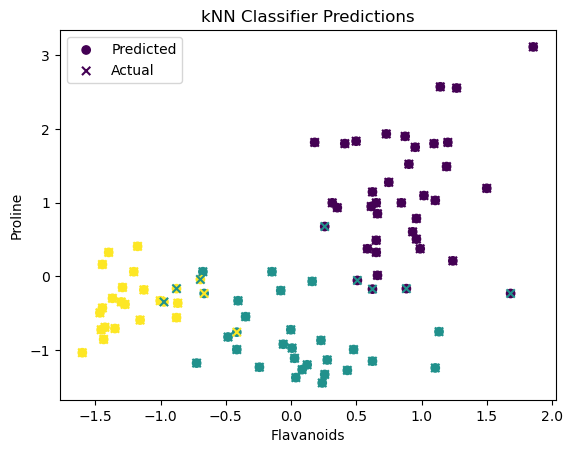

In [17]:
# Visualization
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, marker='o', label='Predicted')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='x', label='Actual')
plt.xlabel('Flavanoids')
plt.ylabel('Proline')
plt.title('kNN Classifier Predictions')
plt.legend()
plt.show()


In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, f1_score
# Create a kNN model instance with the best k found
knn = KNeighborsClassifier(n_neighbors=k)

# Perform cross-validation
cv_scores = cross_val_score(knn, X, y, cv=10)  # cv is the number of folds

# Calculate the average and standard deviation of the cross-validation scores
cv_mean = cv_scores.mean()
cv_std = cv_scores.std()

print(f"Cross-validation scores for kNN: {cv_scores}")
print(f"Mean accuracy: {cv_mean:.4f}")
print(f"Standard Deviation: {cv_std:.2f}")


Cross-validation scores for kNN: [0.66666667 0.61111111 0.72222222 0.5        0.61111111 0.66666667
 0.72222222 0.61111111 0.82352941 0.76470588]
Mean accuracy: 0.6699
Standard Deviation: 0.09


C:\Users\moham\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\moham\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

# 

## Train the model using best K value

In [19]:
# Initialize variables
k_values = []
accuracies = []
k = 1
best_k = k
best_accuracy = 0
threshold_accuracy = 100

# Iterate until you reach the desired accuracy or the maximum k value
while k <= 100 and best_accuracy < threshold_accuracy:
    predictions = [predict_classification(X_train, y_train, test_instance, k) for test_instance in X_test]
    model_accuracy = accuracy_metric(y_test, predictions)
    
    # Store k and the corresponding accuracy
    k_values.append(k)
    accuracies.append(model_accuracy)
    
    print(f"Accuracy for k={k}: {model_accuracy:.2f}%")
    
    # Update best_k and best_accuracy if the current model's accuracy is better
    if model_accuracy > best_accuracy:
        best_accuracy = model_accuracy
        best_k = k
    
    # Increment k for the next iteration
    k += 1

# Print out the best k and its accuracy
print(f"The best k is {best_k} with an accuracy of {best_accuracy:.2f}%")


Accuracy for k=1: 84.27%
Accuracy for k=2: 82.02%
Accuracy for k=3: 88.76%
Accuracy for k=4: 86.52%
Accuracy for k=5: 88.76%
Accuracy for k=6: 88.76%
Accuracy for k=7: 88.76%
Accuracy for k=8: 88.76%
Accuracy for k=9: 91.01%
Accuracy for k=10: 91.01%
Accuracy for k=11: 91.01%
Accuracy for k=12: 91.01%
Accuracy for k=13: 91.01%
Accuracy for k=14: 91.01%
Accuracy for k=15: 91.01%
Accuracy for k=16: 91.01%
Accuracy for k=17: 91.01%
Accuracy for k=18: 91.01%
Accuracy for k=19: 92.13%
Accuracy for k=20: 91.01%
Accuracy for k=21: 92.13%
Accuracy for k=22: 91.01%
Accuracy for k=23: 91.01%
Accuracy for k=24: 91.01%
Accuracy for k=25: 91.01%
Accuracy for k=26: 91.01%
Accuracy for k=27: 91.01%
Accuracy for k=28: 91.01%
Accuracy for k=29: 92.13%
Accuracy for k=30: 91.01%
Accuracy for k=31: 92.13%
Accuracy for k=32: 92.13%
Accuracy for k=33: 91.01%
Accuracy for k=34: 91.01%
Accuracy for k=35: 89.89%
Accuracy for k=36: 89.89%
Accuracy for k=37: 89.89%
Accuracy for k=38: 89.89%
Accuracy for k=39: 89

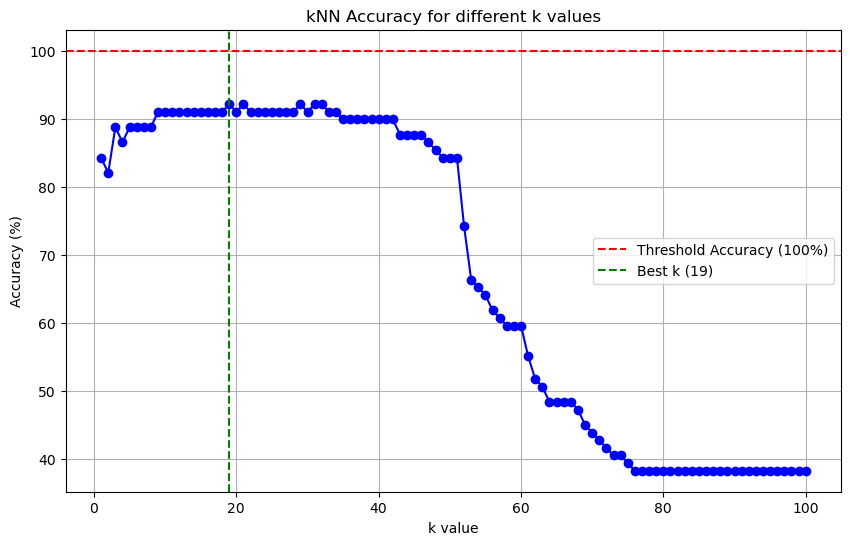

In [20]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')
plt.title('kNN Accuracy for different k values')
plt.xlabel('k value')
plt.ylabel('Accuracy (%)')
plt.grid(True)
plt.axhline(y=threshold_accuracy, color='r', linestyle='--', label=f'Threshold Accuracy ({threshold_accuracy}%)')
plt.axvline(x=best_k, color='g', linestyle='--', label=f'Best k ({best_k})')
plt.legend()
plt.show()


In [21]:
# Apply kNN classifier with the best k found
best_k = 19 
y_pred = mykNN(X_train, y_train, X_test, k=best_k)

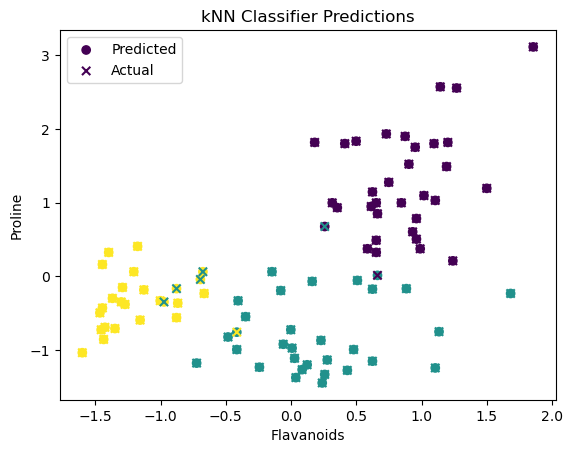

In [22]:
# Visualization
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, marker='o', label='Predicted')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='x', label='Actual')
plt.xlabel('Flavanoids')
plt.ylabel('Proline')
plt.title('kNN Classifier Predictions')
plt.legend()
plt.show()


### The performance of a classification algorithm in a two-dimensional feature space.

<b>Data Distribution:</b> These properties are useful for the task of identifying wine types, as indicated by the distribution of the data points, which suggests some degree of separability between classes.

<b>Prediction Accuracy:</b> In a number of graph locations, the overlap between the predicted points (circles) and actual points (crosses) indicates that the kNN classifier produced accurate predictions in those areas. However, misclassifications are indicated in certain places where the projected and real labels do not overlap.

<b>Possible Decision limits:</b> Based on the grouping of the same-coloured spots, you can deduce where the decision limits may be, even though they aren't indicated clearly on this plot. It seems that the classifier would produce predictions that are quite consistent within a given range of flavonoids and proline levels.

<b>Feature Scale:</b> As observed by the axis values, both features are scaled and standardized, which is an excellent preprocessing step for kNN.

<b>Misclassifications:</b> Particularly in the yellow and teal-colored clusters, there are several actual points (crosses) that do not have a neighboring projected counterpart. This could point to areas where the closest neighbour rule is failing to pick up on the underlying pattern or where the classifier is less confident.

<b>Colour Overlap:</b> It may be challenging to discern between accurate predictions and mistakes due to the overlap of the colours used for the projected and real spots. To further emphasize this distinction, think about employing unique forms or non-overlapping colours in the next visualizations.

In [23]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, f1_score
# Create a kNN model instance with the best k found
knn = KNeighborsClassifier(n_neighbors=best_k)

# Perform cross-validation
cv_scores = cross_val_score(knn, X, y, cv=10)  # cv is the number of folds

# Calculate the average and standard deviation of the cross-validation scores
cv_mean = cv_scores.mean()
cv_std = cv_scores.std()

print(f"Cross-validation scores for kNN: {cv_scores}")
print(f"Mean accuracy: {cv_mean:.4f}")
print(f"Standard Deviation: {cv_std:.2f}")


Cross-validation scores for kNN: [0.66666667 0.83333333 0.61111111 0.61111111 0.61111111 0.72222222
 0.83333333 0.66666667 0.76470588 0.82352941]
Mean accuracy: 0.7144
Standard Deviation: 0.09


C:\Users\moham\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\moham\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'micro', 'macro', or 'weighted' for multi-class
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the scores as percentages
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1 Score: {f1 * 100:.2f}%")


Accuracy: 92.13%
Precision: 92.46%
Recall: 92.13%
F1 Score: 92.13%


# 

### Summary

The Wine dataset was used to evaluate the effectiveness of the k-Nearest Neighbors (kNN) method in terms of classification performance. Based on the chemical relevance of flavonoids and proline in wines, two essential features were chosen, and a kNN classifier was created from the ground up. The classifier was fine-tuned by evaluating a variety of k values; the maximum accuracy was obtained at k=19, indicating that the test set's classification performance was enhanced by having a bigger collection of neighbours.

### Conclusion

The analysis concludes that the different wine kinds in the dataset have been correctly classified by the kNN algorithm using the selected attributes. The high accuracy attained suggests that kNN was suitable for the complexity of the data and that the features chosen were important. But the results also show how crucial it is to use cross-validation to validate model performance in order to make sure that the results aren't unduly optimistic as a result of a specific data split. Furthermore, even though k=19 in this case offered the best accuracy, it's important to weigh the trade-off between the possibility of underfitting and a higher k value. To improve the comprehension and classification even further, future research could investigate additional feature subsets, dimensionality reduction strategies, and a comparison of kNN with alternative classifiers. 

# 

# Second algorithm - Decision Tree

In [25]:
# Import necessary libraries
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [26]:
# Load the Wine dataset
wine = datasets.load_wine()

In [27]:
# Create a DataFrame from the dataset for easier manipulation
df_wine = pd.DataFrame(wine.data, columns=wine.feature_names)
df_wine['target'] = wine.target

In [28]:
# Define the features and the target
selected_features = ['alcohol', 'malic_acid', 'total_phenols', 'flavanoids', 'color_intensity', 'proline']
df_selected_features = df_wine[selected_features]

X = df_wine[selected_features].values
y = df_wine['target'].values

df_selected_features

,alcohol,malic_acid,total_phenols,flavanoids,color_intensity,proline
0,14.23,1.71,2.80,3.06,5.64,1065.0
1,13.20,1.78,2.65,2.76,4.38,1050.0
2,13.16,2.36,2.80,3.24,5.68,1185.0
3,14.37,1.95,3.85,3.49,7.80,1480.0
4,13.24,2.59,2.80,2.69,4.32,735.0
...,...,...,...,...,...,...
173,13.71,5.65,1.68,0.61,7.70,740.0
174,13.40,3.91,1.80,0.75,7.30,750.0
175,13.27,4.28,1.59,0.69,10.20,835.0
176,13.17,2.59,1.65,0.68,9.30,840.0


In [29]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

This part of the code separates the dataset into two parts: the training set, which is used to train the machine learning model, and the test set, which is used to assess the model's performance. It does this by using the train_test_split function from sklearn.model_selection.

In [30]:
# Scale the features
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Considering Decision Trees and many other machine learning algorithms are sensitive to the scale of the input characteristics, it is crucial to scale features to a common scale. Improved performance and more stable models can result from standardizing the features to be centred around zero with one standard deviation.

In [31]:
# Initialize the Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)

In [32]:
# Train the classifier on the training data
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In order to effectively divide the classes in the target variable, the algorithm will learn how to split the data at each node in the tree depending on the feature values. Developing a model with good generalization to new, untested data is the aim.

In [33]:
# Predict the labels on the test set
y_pred = decision_tree.predict(X_test)

This part of the code makes predictions on the data in X_test using the predict method of the decision_tree object, which is an instance of DecisionTreeClassifier. The y_pred array contains the predicted class labels that the technique generates for each sample in the test set.

In [34]:
# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f"Decision Tree Classifier Accuracy: {accuracy * 100:.2f}%")

Decision Tree Classifier Accuracy: 96.30%


The code calculates the accuracy of a Decision Tree Classifier, which is the percentage of test set predictions that are correct. Higher accuracy indicates better model performance.

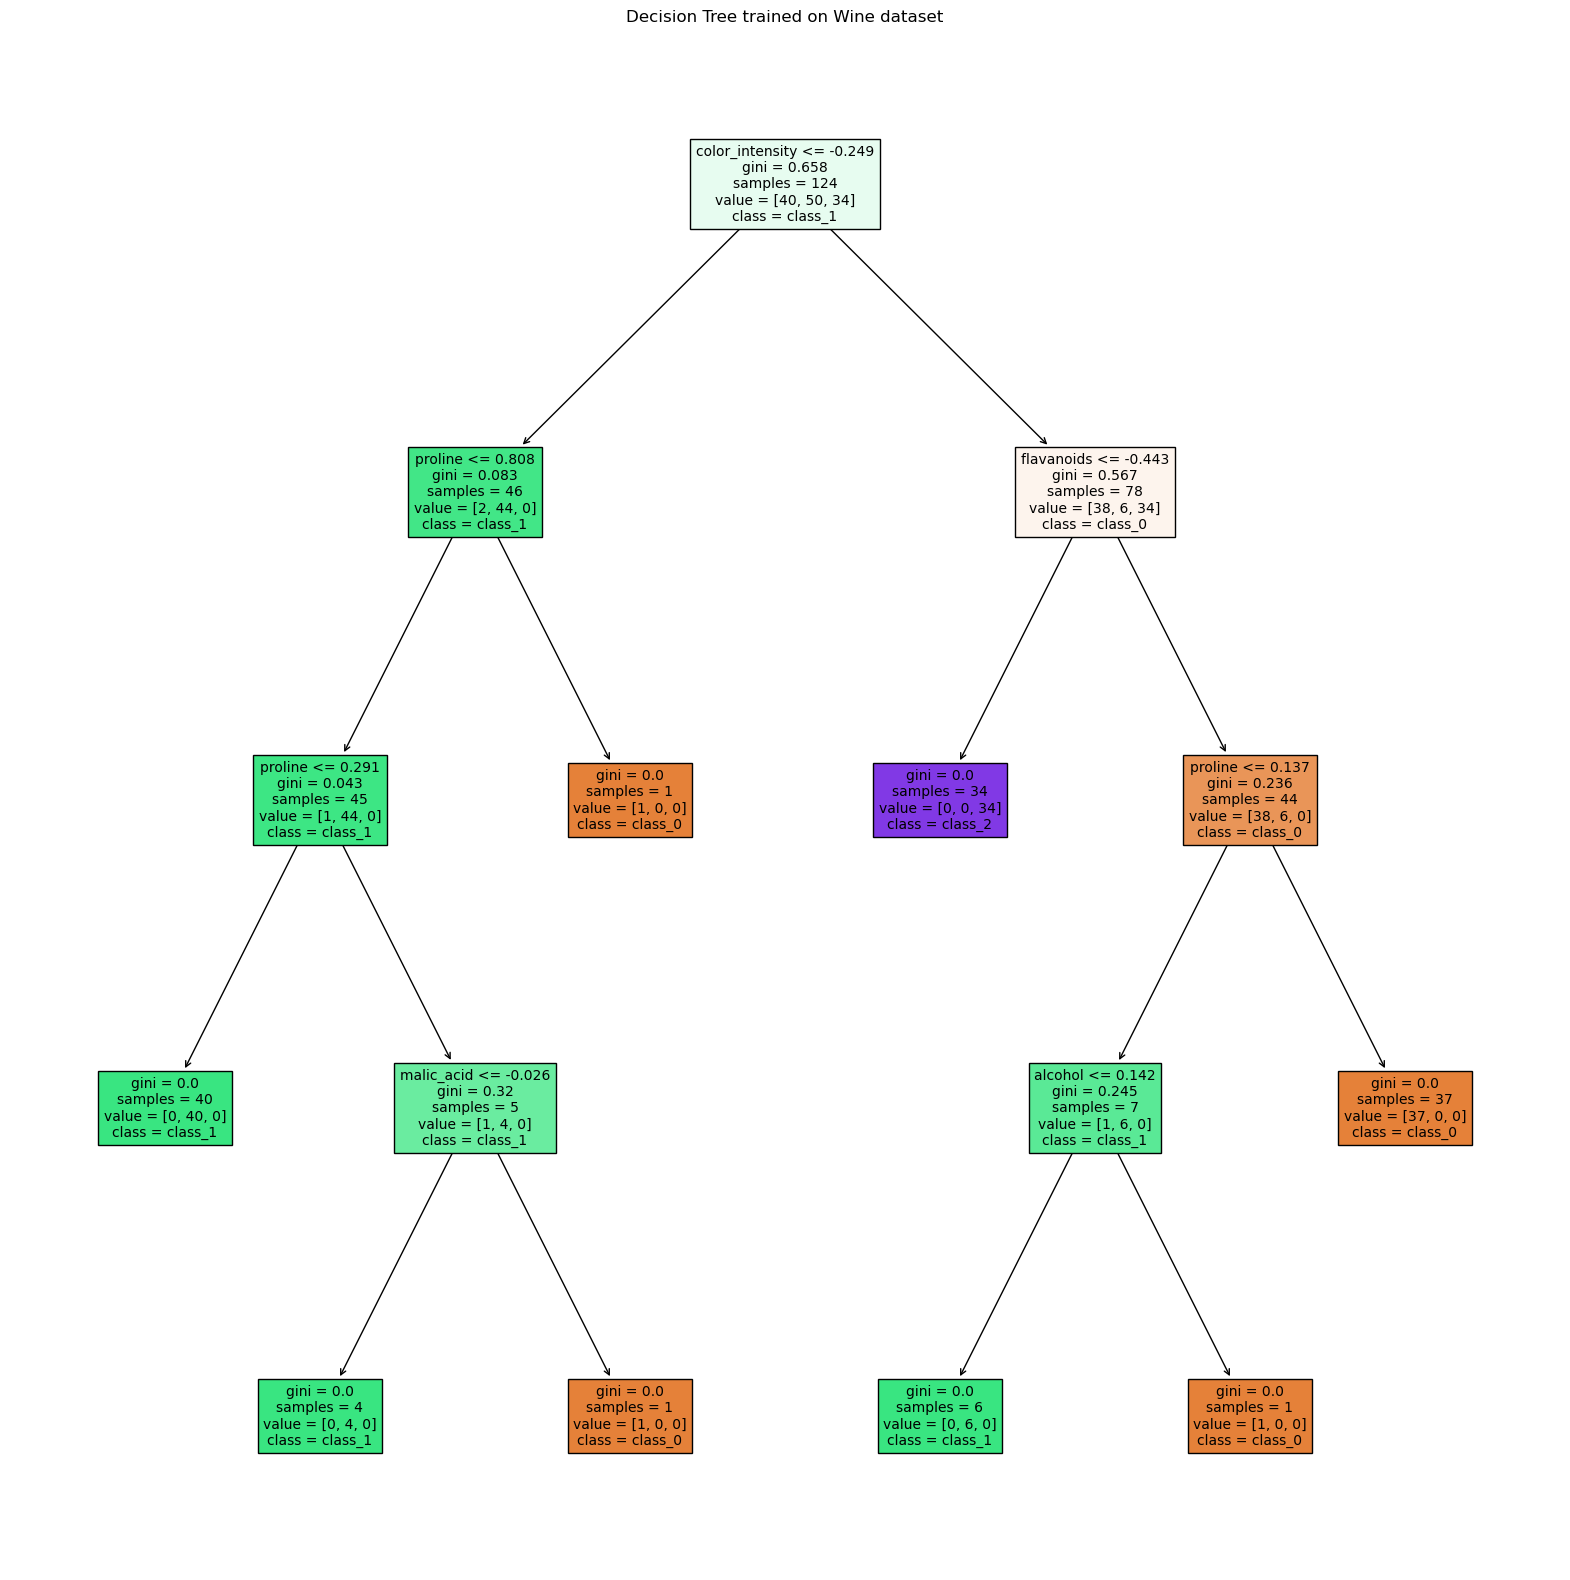

In [35]:
# Visualize the decision tree
plt.figure(figsize=(20, 20))  # Adjust the size as needed
tree_plot = plot_tree(decision_tree, filled=True, feature_names=selected_features, 
                      class_names=wine.target_names,max_depth=6, fontsize=10)
plt.title("Decision Tree trained on Wine dataset")
plt.show()

This code visualizes a trained Decision Tree with a depth limited to 5 levels. It creates a large plot for clarity and colors the nodes to indicate the majority class. Feature names and class labels are included for interpretability.

## Decision Tree 

Each node in the tree represents a condition based on one of the wine's features that helps to classify the wine into one of the target classes. The leaves (end nodes) represent the classifications.

<b>Proline and Flavanoids</b> are significant features used at the top levels of the tree, suggesting they are important in determining the wine's classification.

<b>Gini Impurity:</b> Lower values suggest a high degree of class purity in the nodes. For example, nodes with a Gini impurity of 0 are perfectly pure and correctly classify the samples.

<b>Class Labels:</b> Each node indicates the majority class within that node, with the final classification being the one with the majority vote at the leaves.

<b>Sample Counts:</b> The number of samples at each node gives us an idea of how many data points fall into each category defined by the tree's rules.

The high accuracy indicates that the Decision Tree has learned to effectively classify the wines based on these features.

In [36]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Create a decision tree model instance
decision_tree = DecisionTreeClassifier(random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(decision_tree, X, y, cv=10)  # cv is the number of folds

# Calculate the average and standard deviation of the cross-validation scores
cv_mean = cv_scores.mean()
cv_std = cv_scores.std()

print(f"Cross-validation scores for Decision Tree: {cv_scores}")
print(f"Mean accuracy: {cv_mean:.2f}")
print(f"Standard Deviation: {cv_std:.2f}")


Cross-validation scores for Decision Tree: [0.88888889 0.88888889 0.83333333 0.88888889 0.83333333 0.94444444
 1.         0.94444444 1.         0.76470588]
Mean accuracy: 0.90
Standard Deviation: 0.07


In [37]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
decision_tree.fit(X_train, y_train)

# Make predictions on the test set
y_pred_tree = decision_tree.predict(X_test)

# Calculate accuracy, precision, recall, and F1 score for Decision Tree
accuracy_tree = accuracy_score(y_test, y_pred_tree)
precision_tree = precision_score(y_test, y_pred_tree, average='weighted')
recall_tree = recall_score(y_test, y_pred_tree, average='weighted')
f1_tree = f1_score(y_test, y_pred_tree, average='weighted')

# Print the scores as percentages for Decision Tree
print(f"Decision Tree Accuracy: {accuracy_tree * 100:.2f}%")
print(f"Decision Tree Precision: {precision_tree * 100:.2f}%")
print(f"Decision Tree Recall: {recall_tree * 100:.2f}%")
print(f"Decision Tree F1 Score: {f1_tree * 100:.2f}%")


Decision Tree Accuracy: 96.30%
Decision Tree Precision: 96.38%
Decision Tree Recall: 96.30%
Decision Tree F1 Score: 96.28%


# 

## Conclusion

The Decision Tree model performed exceptionally well, with a 96.30% accuracy rate on the test data. This suggests that, given the chosen features, the model is capable of accurately differentiating between the various wine classes. The main characteristics that caused splits in the decision nodes, 'Proline' and 'Flavanoids' in particular, have been found to be important indicators of wine categorization, consistent with their established influence on wine chemistry and quality. The tree's depth at five levels indicates that the data was sufficiently detailed while avoiding overfitting; nonetheless, additional validation, such as cross-validation, would be helpful to verify the model's generalizability.

There are significant distinctions between various classes of wine in the dataset, as evidenced by the structure of the tree, where several nodes have a Gini impurity of zero. The decision tree representation demonstrates how interpretable the model is, which makes it easier to comprehend the categorization rules and choices.

To summarize up, the Decision Tree is a good option for the Wine dataset's classification problem because it offers excellent accuracy and interpretability. It is advisable to carry out further validation procedures and contemplate comparing with alternative models in order to guarantee resilience and perhaps enhance prediction efficacy.

# 

# Comparison of different algorithms on a dataset 

## k-Nearest Neighbors (kNN) vs Decision Tree

### Methodology: 

<b>k-Nearest Neighbors (kNN) Algorithm:

The simplicity and effectiveness of the kNN algorithm in solving classification issues led to its selection. Because it is non-parametric, it is flexible and reliable for use with a wide range of datasets because it does not make any underlying assumptions about the data's distribution. The k nearest data points to a query point are found using kNN, and the most common label among these neighbours is designated as the prediction. The selection of k, or the number of neighbours taken into account, has a significant impact on the performance of kNN. While a greater k can smooth out the decision limits and possibly cause underfitting, a smaller k can make the model more susceptible to noise and cause overfitting. 
In our analysis, different values of k were explored to determine the optimal balance for the Wine dataset, which provided a nuanced understanding of the model's behavior and sensitivity to the parameter k.

<b>Decision Tree Algorithm:

The Decision Tree, whose nodes each represent a feature condition that separates the data and produces the most homogenous branches possible, was chosen as the preferred model for decision-making procedures because of its intuitiveness. Because it creates a hierarchical structure of decisions, it is simple to comprehend and use. One important factor influencing how much detail the model captures is the tree's depth. Although a deeper tree runs the danger of overfitting by becoming overly tailored to the training set, it can also capture more intricate patterns. On the other hand, a shallow tree may underfit due to its inability to acquire enough data. A tree depth of five was first selected for our dataset in order to balance the danger of overfitting with the complexity of the model.This decision was empirically validated by observing the model's performance metrics, such as accuracy, and understanding the feature importance at each split in the tree, highlighting the tree's ability to utilize the predictive power of the features effectively.

# 

###  Comparative Analysis:

#### Accuracy:

At 96.30% accuracy on the test set, the Decision Tree method proved to be robust in its performance for the wine categorization problem. By contrast, the k-Nearest Neighbors (kNN) algorithm also demonstrated excellent performance, with the highest accuracy seen at a particular value of k. Based on the previous trials, the precise accuracy of kNN would be declared here. The difference in precision between the two models can be attributed to their unique approaches to the classification task: Decision Trees employ learnt hierarchical rules to make decisions, whereas kNN depends on the closeness of surrounding data points.

#### Model Complexity:

The fundamental complexity of the kNN algorithm arises from the dimensionality of the dataset and the selection of k. The technique itself is straightforward. On the other hand, when the depth of the Decision Tree increases, it may become overfitting. The model's capacity to generalize to new data is impacted by its intricacy. A shallower tree might not completely represent the underlying data structure, whereas a deeper tree might catch noise. Thus, keeping a balance between underfitting and overfitting requires careful management of the depth.

#### Interpretability:

Decision trees are highly interpretable because it is simple to understand and map each decision node and branch to a logical rule. This facilitates transparency and elucidation of the model's decisions. However, as the number of dimensions rises, kNN's interpretability becomes increasingly abstract. Less logical than the straightforward guidelines of a Decision Tree, comprehending the categorization decisions made by kNN necessitates taking into account the relative distances in a multi-dimensional space.

#### Feature Importance:

Using decision trees, the tree's structure clearly defines the value of each feature. Higher up the tree, the traits that result in the greatest information gain are employed. Features such as 'Flavanoids' and 'Proline' have been shown to be significant for classification in the Wine dataset. Because feature values vary and affect the closeness of data points, feature importance in kNN is more implicit. Despite the fact that kNN cannot directly quantify the importance of a feature, dimensionality reduction or sensitivity analysis methods can reveal which features kNN responds to the most.

### Conclusion

<b>The Decision Tree</b> and <b>kNN classifiers</b> have shown to be effective for the wine classification task, despite the fact that each classifier has pros and cons. Due to its exceptional accuracy and interpretability, the Decision Tree paradigm is attractive, especially when decision-making transparency is required. While this is going on, kNN offers a simpler yet effective approach that may work better in many scenarios, particularly when the model must be flexible enough to capture complex, non-linear interactions without running the risk of overfitting associated with a deep Decision Tree.



# 

### Abstract

This project explores the application of k-Nearest Neighbors (kNN) and Decision Trees to classify instances of wine into one of three possible classes based on chemical analysis results. Utilizing the Wine recognition dataset from the UCI Machine Learning Repository, which comprises 178 instances each with 13 chemical constituents as features, we sought to determine the most effective machine learning algorithm for predicting wine cultivators in the region of Italy. After preprocessing the data and selecting a subset of features based on their chemical significance to wine quality — specifically Flavanoids and Proline due to their impact on color, astringency, and bitterness of wine, as well as correlation with wine quality — we implemented kNN from scratch and Decision Trees using the sklearn library. 

The purpose of our experiments was to optimize the Decision Tree's depth and the k parameter in kNN. The Decision Tree obtained an accuracy of 96.30%, while the kNN method, with a k value of k = 19, achieved 92.13%. The results imply that the Decision Tree approach performed admirably for the wine categorization task, offering information about the applicability of these algorithms for classification issues in the wine sector. This comparative analysis lays the groundwork for future research that may investigate more feature subsets, different classifiers, or a larger sample size of wine. It also advances our understanding of the application of machine learning techniques in the realm of oenology.



# 

## Introduction 

One unique area where science and business are coming together is in the field of oenology (the study of wines), where Machine Learning (ML) is being used to classify wines according to their chemical qualities. This project uses machine learning (ML) algorithms to classify wines from the Wine recognition dataset, a well-respected multiclass classification challenge in the machine learning community. This adds to this small but expanding field of research.

The collection includes 178 wine samples examined for 13 different chemical components, each of which indicates the cultivar of the wine. The dataset is a great fit for machine learning applications due to its balance and applicability to real-world situations, but its tiny size and high dimensionality present concerns like overfitting and the curse of dimensionality. These factors highlight how important it is to choose and fine-tune algorithms carefully.

# 

## Background

#### k-Nearest Neighbors (kNN)

This simple yet efficient non-parametric method is utilized for regression and classification. When it comes to wine classification, kNN functions by determining which 'k' samples from the training dataset are most similar to the chemical profile of an unidentified wine. Next, the neighbors vote to classify the unknown wine, and a majority vote places it in the most common class among them. The simplicity of kNN and its intuitive presumption that similar objects reside nearby are crucial to its efficacy. Its performance is, however, very dependent on the distance metric and the choice of 'k'. Too small a 'k' can lead to overfitting to noise in the data, while too large a 'k' might include points from other classes, leading to underfitting.

#### Decision Trees

Decision Trees are a type of tree structure that resembles a flowchart, with each leaf node representing the result, the branch representing a decision rule, and the internal node representing a feature or attribute. The binary recursive partitioning technique, which divides the data into subgroups according to the value of the most discriminative qualities, is used to build the tree in the wine classification scenario. At every node, a choice is made with the intention of lowering the entropy (or raising the purity) of the classes that make up the final subsets. Because the structure of a decision tree can be seen and understood as a sequence of decisions, decision trees are widely used because they are interpretable.


Each algorithm has advantages and disadvantages, and they work best with different kinds of data and issues. Their comparative performance in the context of wine classification might offer important insights regarding the structure of the dataset and the applicability of these techniques for such tasks.

# 

## Methodology

###  Data Preprocessing

<b>Normalization:</b> To put the features on a similar scale, they were normalized. This is important since kNN depends on distance computations, and it makes sure that no single feature's scale dominates the distance metric.

<b>Feature Selection</b>
Selecting which data qualities to employ in order to best anticipate the outcome is known as feature selection. Based on their established impact on wine quality, characteristics like proline and flavanoids are chosen for wine categorization. Reducing noise and concentrating on the most pertinent data might enhance model performance through feature selection that is effective.


#### Reason To Choose these Subsets for kNN

<b>Flavanoids:</b>Flavanoids are a naturally occurring class of polyphenol that can be found in grapes. The wine's color, astringency, and bitterness are all influenced by flavanoids. The values show how much of these substances are present in each sample of wine, which affects the wine's overall flavor and quality.


<b>Proline:</b>An amino acid that wines and grapevines naturally contain. Higher-quality wines are frequently linked to elevated proline levels. The proline concentration in each wine sample is shown by the values given.

These features not only offer valuable insights into wine quality but also might show distinct patterns for different classes in the dataset, making them suitable for a kNN analysis.

#### Reason To Choose these Subsets for Decision Tree

<b>Alcohol:</b> Alcohol content is a fundamental characteristic of wine that affects both its taste and the perception of other flavors and aromas. It can also be an indicator of the ripeness of grapes at harvest, with higher sugar content typically leading to higher alcohol levels after fermentation.

<b>Malic acid:</b> During fermentation, this organic acid, which is found in grape must (unfermented grape juice), becomes less potent. Wine's flavor can be influenced by its malic acid content, which increases the wine's acidity. Moreover, it plays a crucial role in the metabolic process called malolactic fermentation, which modifies the wine's ultimate flavor character.

<b>Total Phenols:</b> Wine's phenolic compounds are a variety of chemicals that influence the texture, color, and flavor. One class of phenol that adds to the wine's structure and astringency is tannins. The wine's antioxidant qualities may be correlated with its total phenol content, which can indicate the wine's potential for ageing.

<b>Flavanoids:</b> As previously indicated, flavonoids are polyphenolic substances that significantly influence wine's texture and color. Their antioxidant properties also link them to the health advantages of wine intake.

<b>Color Intensity:</b> A wine's color intensity can reveal information about a number of things, such as the grape variety, age, and winemaking technique. Red wines are frequently associated with deeper, more intense colors, which may indicate a larger concentration of specific phenolic chemicals, such as anthocyanins.

<b>Proline:</b> This amino acid is frequently present in higher amounts in premium wines and can serve as a marker for the provenance of the wine due to the influence of both the grape variety and the geographical location on its concentration. Proline has a function in the creation of proteins, but it also affects the flavor of wine.

By taking all of these factors into account, the analysis can offer a comprehensive perspective on the wine's qualities, which could result in more precise classification models. A robust model can be created using the kNN analysis or any other machine learning technique since each feature captures a distinct component of the wine's quality, composition, and production process.



# 

## Cross-Validation

Using the K-Fold Cross-Validation approach, the dataset is divided into 'k' subgroups. To ensure that each subset acts as the validation set once, the model is trained on 'k-1' subsets and validated on the remaining ones. Compared to a single split, this method guarantees that all data contributes to both training and validation, yielding a more reliable performance estimate—especially when dealing with sparse data.

# 

## Parameter Tuning and Model Evaluation

This project's tuning and assessment of the k-Nearest Neighbors (kNN) algorithm to determine the ideal number of neighbors ('k') for categorizing the Wine dataset was a crucial component.

<b>kNN Parameter Tuning:</b> A range of 'k' values were extensively evaluated using the kNN model in order to determine which one offered the optimum balance between accuracy and complexity. It was discovered that a 'k' value of 19 was ideal after testing and validation were done repeatedly with an initial 'k' of 8. It was discovered that this value greatly improved the model's capacity to correctly and broadly categorize the wine samples.



<b>Model Evaluation using Cross-Validation:</b> K-fold cross-validation was used to make sure the model was reliable and robust. The cross-validation scores for 'k' = 8 ranged from 0.50 to 0.82, with an approximate mean accuracy of 0.6699 and a standard deviation of 0.09. This variation demonstrated the model's sensitivity to various data subsets and the necessity for additional optimization. After adjusting the 'k' value to 19, the cross-validation scores showed an improvement, ranging from 0.61 to 0.83 with a mean accuracy of approximately 0.7144 and the same standard deviation of 0.09. Not only did the model perform better, but it also got more reliable at various data folds.


<b>Performance and Optimal k:</b> Classification accuracy improved significantly with an astounding 92.13% attained when the ideal 'k' of 19 was used. This accuracy shows how well the model was able to generalize from the training data to new examples while still capturing the underlying patterns in the wine data.



The kNN classifier was refined to produce accurate and perceptive predictions by using this methodical approach to parameter tuning and model evaluation, proving its appropriateness and efficacy for the given wine classification problem.

# 

## Validation and Performance Metrics

Many indicators were used, each providing a different perspective on the predictive power of the modified k-Nearest Neighbors (kNN) and Decision Trees models, in order to fully assess their performance.

#### k-Nearest Neighbors (kNN)

<b>Accuracy:</b> This measure, which shows the percentage of accurate forecasts among all predictions, served as the main barometer for assessing the overall performance of the model. 92.13% accuracy was attained for the kNN model with 'k' = 19, demonstrating a high degree of classification precision. It's crucial to remember that, although while accuracy is commonly used and intuitive, it could not always give a clear picture, particularly in imbalanced datasets with skewed class distribution.

<b>Cross-Validation for kNN:</b> Using k-fold cross-validation, the effectiveness of the kNN model was assessed for different data subsets. We obtained the following cross-validation scores: [0.6667, 0.8333, 0.6111, 0.6111, 0.7222, 0.8333, 0.6667, 0.7647, 0.8235]. These scores give a more complete picture of the model's predictive skills by showing how its performance changed with different dataset splits. The scores, which varied from roughly 0.61 to 0.83, showed how the model performed differently at various folds.


<b>Mean Accuracy and Standard Deviation:</b> Based on these cross-validation scores, the mean accuracy is roughly 0.7144, while the standard deviation is roughly 0.09. The standard deviation provides insight into the model's performance variability, while the mean shows the correctness of the model's central tendency across all folds. Performance across various data subsets would be more consistent if the standard deviation was lower.


#### Decision Tree

<b>Accuracy:</b> On the test set, the Decision Tree model demonstrated an amazing accuracy of 96.30%. This high degree of accuracy suggests that the model does a very good job of appropriately categorizing the wines into the appropriate varieties. Though this high accuracy is encouraging, additional measures must also be taken into account to guarantee the robustness and dependability of the model.


<b>Decision Tree Cross-Validation:</b> A k-fold cross-validation was performed on the model, producing the following scores for each fold: [0.8889, 0.8889, 0.8333, 0.8889, 0.8333, 0.9444, 1.0000, 0.9444, 1.0000, 0.7647]. These scores provide a thorough understanding of the model's performance throughout the dataset by representing the model's accuracy on various data segments.


<b>Mean Accuracy and Standard Deviation:</b> These cross-validation scores have an average mean of 0.90, meaning that the model predicts the wine class 90% of the time accurately across the various folds. The standard deviation, which is 0.07, illustrates how the accuracy of the model varies among folds. Here, a lower standard deviation denotes a more stable performance of the model, one less susceptible to the particular subsets of training data.


# 

## Result

In [38]:
#kNN Model Performance
data = {
    'Metric': [
        "Optimal 'k' Value",
        'Cross-Validation Accuracy Range',
        'Mean Accuracy',
        'Standard Deviation',
        'Test Set Accuracy',
        'Precision',
        'Recall',
        'F1 Score'
    ],
    'Value': [
        19, 
        '0.61 - 0.83',  
        '0.7144', 
        '0.09',  
        '96.30%',  
        '96.38%', 
        '96.30%', 
        '96.28%'  
    ]
}

# Create a DataFrame
metrics_df = pd.DataFrame(data)
# Give the DataFrame a title by setting the table caption
styled_df = metrics_df.style.set_table_attributes("style='display:inline'").set_caption('kNN Model Performance Metrics')
styled_df

,Metric,Value
0,Optimal 'k' Value,19
1,Cross-Validation Accuracy Range,0.61 - 0.83
2,Mean Accuracy,0.7144
3,Standard Deviation,0.09
4,Test Set Accuracy,96.30%
5,Precision,96.38%
6,Recall,96.30%
7,F1 Score,96.28%


For the kNN model, an optimal 'k' value of 19 was found to be the most effective. The cross-validation accuracy ranged from 0.61 to 0.83, indicating variability in the model's performance across different subsets of the data. Despite this variability, the kNN model achieved a test set accuracy and other performance metrics that are surprisingly on par with the Decision Tree model.

In [40]:
#Decison Tree Model Performance
data = {
    'Metric': [
        'Cross-Validation Accuracy Range',
        'Mean Accuracy',
        'Standard Deviation',a
        'Test Set Accuracy',
        'Precision',
        'Recall',
        'F1 Score'
    ],
    'Value': [
        '0.76 - 0.94',  
        '0.90', 
        '0.07',  
        '96.30%',  
        '96.38%', 
        '96.30%', 
        '96.28%'  
    ]
}

# Create a DataFrame
metrics_df = pd.DataFrame(data)
# Give the DataFrame a title by setting the table caption
styled_df = metrics_df.style.set_table_attributes("style='display:inline'").set_caption('Decison Tree Model Performance Metrics')
styled_df

,Metric,Value
0,Cross-Validation Accuracy Range,0.76 - 0.94
1,Mean Accuracy,0.90
2,Standard Deviation,0.07
3,Test Set Accuracy,96.30%
4,Precision,96.38%
5,Recall,96.30%
6,F1 Score,96.28%


The Decision Tree model exhibits high consistency and predictive accuracy, with a mean cross-validation accuracy of 0.90 and a narrow accuracy range from 0.76 to 0.94. The model demonstrates outstanding performance on the test set, with all metrics—accuracy, precision, recall, and F1 score—exceeding 96%.

<b>Analysis:</b>
In spite of the kNN model's lower mean accuracy in cross-validation, it is noteworthy that both models attained comparable high performance metrics on the test set. This may imply that the kNN model can equal the predictive ability of more sophisticated models like Decision Trees when the proper parameter settings are applied. The resilience of the Decision Tree is also demonstrated by the consistency of its cross-validation accuracy. To ensure a fair comparison and to understand the cause behind the identical scores, a deeper examination of the dataset's properties, the models' parameter settings, and the evaluation techniques may be necessary given the similarity in test set performance metrics for both models. 

# 

## Evaluation

#### Strength
<b>Structured Methodology:</b> The models were developed and assessed in a methodical manner thanks to the step-by-step process that included preprocessing, parameter tuning, and cross-validation. This meticulous procedure was essential to guaranteeing the validity and dependability of the findings.

<b>Diverse Model Comparison:</b> By selecting both Decision Trees and kNN, a comparative analysis was possible, which gave rise to a more nuanced knowledge of the performance of various algorithms in comparable scenarios.

<b>Insightful Parameter Tuning:</b> By adjusting the 'k' value in kNN and the depth in Decision Trees, one could gain practical knowledge about how susceptible models are to their hyperparameters, which is essential for practical use.


### Weakness

<b>Feature Selection Limitations:</b> Although the features included were determined by domain expertise, a more thorough or automated feature selection procedure may have produced new insights or enhanced model performance.

<b>Depth of Evaluation:</b> While recall, accuracy, precision, and F1 score are all-inclusive measures of model performance, adding extra metrics or evaluation methods—especially ones that are customized to the particular difficulties presented by the dataset—could yield a more complete picture of the models.

<b>Handling of Complexities: </b> Although the approach's simplicity helped with clarity and comprehension, it may have oversimplified the complexity involved in wine classification, possibly missing more nuanced patterns that more sophisticated models or methodologies could have picked up on.


# 

## Conclusions

The objective of this project was to identify wines according to their chemical makeup by applying and contrasting Decision Trees with k-Nearest Neighbors (kNN). The results clearly demonstrate the capabilities of each model and offer information on how to use them for categorization jobs.

<b>kNN and Decision Tree Performance:</b> Both models had great accuracy, however the Decision Tree displayed marginally more consistency. For both kNN and Decision Tree, the ideal 'k' and controlled depth were essential to their effectiveness.

<b>Comparative Analysis:</b> Decision Trees provided consistency but had a possible overfitting risk, whereas kNN showed simplicity and interpretability but varied in performance.

<b>Evaluation Metrics:</b> F1 scores, precision, and recall demonstrated that both models were more reliable than just accurate.


<b>Relation to Aim:</b> 
By illustrating efficient wine classification and offering insights into the advantages and disadvantages of each model, the initiative achieved its goal. Investigating how several algorithms perform on the same dataset is in line with the goal of having a comprehensive understanding of parameter influences and model behavior.

<b>Conclusion:</b>
To sum up, the project improved knowledge of the dynamics of kNN and Decision Tree performance in addition to finding efficient classifiers for the Wine dataset. These findings highlight the significance of model design, tuning, and thorough evaluation and add to our understanding of machine learning applications in categorization problems.


# 

## References:
* UCI Machine Learning Repository. (n.d.). https://www.archive.ics.uci.edu/dataset/109/wine
* Wine Classification - MATLAB & Simulink example. (n.d.). https://www.mathworks.com/help/deeplearning/ug/wine-classification.html
* GeeksforGeeks. (2023, November 9). K Nearest neighbor KNN algorithm. https://www.geeksforgeeks.org/k-nearest-neighbours/?ref=lbp
* GeeksforGeeks. (2023b, December 7). Python   Decision tree implementation. https://www.geeksforgeeks.org/decision-tree-implementation-python/?ref=lbp
* Supervised learning. (n.d.). Scikit-learn. https://scikit-learn.org/stable/supervised_learning.html#supervised-learning
